In [4]:
!pip install pandas nltk wordcloud


Defaulting to user installation because normal site-packages is not writeable


In [28]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string

# 载入数据，假设数据在CSV文件中，有一个名为 'text' 的列包含文本数据
df = pd.read_csv('11051.csv') 
print(df['text'])

# 合并所有文本数据为一个字符串
text = ' '.join(df['text'])

0    「最食人間煙火色」是一部靠網友口碑開始受到大家討論的劇，默默的一口氣上架，然後隨著追完的人越...
Name: text, dtype: object


In [73]:
import re

# 指定需要删除的符号，以逗号和句号为例
symbols_to_remove = ['，', '.','（','）','！','、','「','」','：','？','。','-','／']

words_to_remove = ["的","在","與","等","和","被","是","中","上","於","又","哈","不","也","就"]

# 创建一个函数来删除符号
def remove_symbols(text):
    for symbol in symbols_to_remove:
        text = text.replace(symbol, '')
    return text

def remove_words(text):
    for word in words_to_remove:
        text = text.replace(word, '')
    return text

# 创建一个函数来删除文本中的所有数字
def remove_numbers(text):
    text_without_numbers = re.sub(r'\d+', '', text)
    return text_without_numbers

def remove_english_words(text):
    text_without_english_words = re.sub(r'[a-zA-Z]+', '', text)
    return text_without_english_words

# 在 'text' 列上应用函数来删除符号
df['text'] = df['text'].apply(remove_symbols)

df['text'] = df['text'].apply(remove_words)

df['text'] = df['text'].apply(remove_numbers)

df['text'] = df['text'].apply(remove_english_words)
# 打印处理后的数据框
print(df)

                                                text
0  最食人間煙火色一部靠網友口碑開始受到大家討論劇默默一口氣架然後隨著追完人越來越多整個討論度跟...


In [74]:
!pip install jieba


Defaulting to user installation because normal site-packages is not writeable


In [75]:
import jieba

# 合并所有处理后的文本数据为一个字符串
text = ' '.join(df['text'])

# 中文分词
seg_list = jieba.cut(text, cut_all=False)

# 将分词结果转换为字符串
segmented_text = ' '.join(seg_list)

# 打印精简后的中文文本
print(segmented_text)


最食 人間 煙 火色 一部 靠 網友 口碑 開始 受到 大家 討論劇 默默 一口 氣架然 後 隨著 追 完人 越來 越 多 整個 討論度 跟 關注 地 慢慢 攀升 我 本人 原本 完全 知道 這部劇 但 因為 陸劇 討論 版 看到 大家 推薦 決定 去 看 一下 一共 集 每集 ~ 分鐘 算長 度 很 剛好 拖拉 劇整 體來 說 一部 有點 文青 跟 藝術 感劇 因為 男主角 設定 住 老宅 藝術家 熱愛古 文物 食人間 煙火 整個 非常 文藝 青年 這樣過 男主角 孤兒 藝術家 爺爺 收養後面 有 爺爺 親孫子 回家 倒 清新 倒底 女主角 銀 行人 員 跟 文青沾邊 所以 算有 衝撞 火花 盧 洋洋 我滿 喜歡 女 演員 她 長 很 我 審美 標準 讓 我 看 得 很 舒服 前 一部 我 追 她 劇見面 吧 現部滿 好看 姐弟 戀 男主角 陳鑫海 我 第一次 看 他 演戲後來 我 一查 才 知道 這部 他 第一部 作品 他 很 適合劇 這種 斯文 禁 慾 角色 演技 雖然 稍 有生 澀 但 還至 太出 戲盧 洋洋 Ｃ Ｐ 感滿賴 有些 集數 片段 會 有些 短語 搭配 畫面 跟 心情 我覺 得 這樣 設計 還滿錯 讓 整部 劇質 感變 好 拍 攝畫面 很 美 還有 老宅 味道 很 讓 我 喜歡 而且 完全 按 套路 劇情 很 值得 稱 讚 你 以 為 男主角 只 假窮 真霸 總 但 你 以 為 哥哥 或 初戀壞 人 但 沒 有司 清盧 洋洋 飾銀行 信 貸部 經理 一個 職場 女強 人 為 了 拉客 戶 低聲 下氣 辛苦 打拼 為 自己 買 了車 希望 有 自己 家司 清 從 小 父母 離婚 各組 家庭 所以 她 從 小 缺乏 愛 某次 追討 銀行 貸款 遇到 了 住 風景區 老宅 景琛 陳 鑫 海飾 兩人 一開始 愉快 但後來 閃婚 景琛 個 熱愛 手工 藝人個 孤兒 爺爺 收養照 顧著 醫院 爺爺 及照 顧爺爺 最 掛念 璟 園司 清閃婚 過程 有點 荒唐 但 這些 重要 總之要 拍 出先 婚後愛嘛 兩人算 賭氣領 了 證結果 馬 鬧 離婚 冷靜期 一個 月 卻 愛了 彼此 其實 景琛 早年 前司 清 相遇 司清 當年 買 下 他 畢業 作品 冬至 女孩 景琛 當年 還替 冬至 當 天生 日無人 陪司 清低 調慶生 但 兩人車 站 錯過 景琛 去 了 司清 

In [76]:
from collections import Counter

# 使用空格分隔文本以获取单词列表
words = segmented_text.split()

# 使用Counter计算每个单词的出现次数
word_count = Counter(words)

# 打印重复出现的单词和它们的出现次数
for word, count in word_count.items():
    if count > 1:
        print(f'单词: {word}, 出现次数: {count}')

单词: 一部, 出现次数: 3
单词: 開始, 出现次数: 2
单词: 大家, 出现次数: 2
单词: 後, 出现次数: 5
单词: 追, 出现次数: 2
单词: 整個, 出现次数: 2
单词: 跟, 出现次数: 7
单词: 慢慢, 出现次数: 2
单词: 我, 出现次数: 11
单词: 原本, 出现次数: 2
单词: 完全, 出现次数: 4
单词: 知道, 出现次数: 2
单词: 這部劇, 出现次数: 2
单词: 但, 出现次数: 9
单词: 因為, 出现次数: 2
单词: 看到, 出现次数: 2
单词: 決定, 出现次数: 2
单词: 去, 出现次数: 4
单词: 看, 出现次数: 5
单词: 很, 出现次数: 11
单词: 說, 出现次数: 3
单词: 有點, 出现次数: 2
单词: 男主角, 出现次数: 4
单词: 住, 出现次数: 3
单词: 老宅, 出现次数: 3
单词: 藝術家, 出现次数: 2
单词: 孤兒, 出现次数: 2
单词: 爺爺, 出现次数: 6
单词: 有, 出现次数: 5
单词: 親孫子, 出现次数: 2
单词: 回家, 出现次数: 2
单词: 倒, 出现次数: 2
单词: 所以, 出现次数: 3
单词: 洋洋, 出现次数: 3
单词: 喜歡, 出现次数: 4
单词: 她, 出现次数: 3
单词: 長, 出现次数: 2
单词: 讓, 出现次数: 4
单词: 得, 出现次数: 3
单词: 好看, 出现次数: 2
单词: 他, 出现次数: 5
单词: 才, 出现次数: 4
单词: 作品, 出现次数: 3
单词: 角色, 出现次数: 2
单词: 有些, 出现次数: 3
单词: 片段, 出现次数: 2
单词: 會, 出现次数: 2
单词: 這樣, 出现次数: 2
单词: 好, 出现次数: 2
单词: 拍, 出现次数: 3
单词: 還有, 出现次数: 3
单词: 而且, 出现次数: 4
单词: 你, 出现次数: 2
单词: 以, 出现次数: 2
单词: 為, 出现次数: 7
单词: 哥哥, 出现次数: 2
单词: 人, 出现次数: 5
单词: 一個, 出现次数: 3
单词: 職場, 出现次数: 2
单词: 了, 出现次数: 7
单词: 自己, 出现次数: 7
单词: 買, 出现次数: 2
单词: 清, 出现次数: 4
单词: 從, 出现次数: 2

In [77]:
co_occurrence = {}
for i in range(len(words)):
    for j in range(i+1, len(words)):
        key = tuple(sorted([words[i], words[j]]))
        co_occurrence[key] = co_occurrence.get(key, 0) + 1

In [78]:
co_occurrence

{('人間', '最食'): 1,
 ('最食', '煙'): 1,
 ('最食', '火色'): 1,
 ('一部', '最食'): 3,
 ('最食', '靠'): 1,
 ('最食', '網友'): 1,
 ('口碑', '最食'): 1,
 ('最食', '開始'): 2,
 ('受到', '最食'): 1,
 ('大家', '最食'): 2,
 ('最食', '討論劇'): 1,
 ('最食', '默默'): 1,
 ('一口', '最食'): 1,
 ('最食', '氣架然'): 1,
 ('後', '最食'): 5,
 ('最食', '隨著'): 1,
 ('最食', '追'): 2,
 ('完人', '最食'): 1,
 ('最食', '越來'): 1,
 ('最食', '越'): 1,
 ('多', '最食'): 1,
 ('整個', '最食'): 2,
 ('最食', '討論度'): 1,
 ('最食', '跟'): 7,
 ('最食', '關注'): 1,
 ('地', '最食'): 1,
 ('慢慢', '最食'): 2,
 ('攀升', '最食'): 1,
 ('我', '最食'): 11,
 ('最食', '本人'): 1,
 ('原本', '最食'): 2,
 ('完全', '最食'): 4,
 ('最食', '知道'): 2,
 ('最食', '這部劇'): 2,
 ('但', '最食'): 9,
 ('因為', '最食'): 2,
 ('最食', '陸劇'): 1,
 ('最食', '討論'): 1,
 ('最食', '版'): 1,
 ('最食', '看到'): 2,
 ('推薦', '最食'): 1,
 ('最食', '決定'): 2,
 ('去', '最食'): 4,
 ('最食', '看'): 5,
 ('一下', '最食'): 1,
 ('一共', '最食'): 1,
 ('最食', '集'): 1,
 ('最食', '每集'): 1,
 ('~', '最食'): 1,
 ('分鐘', '最食'): 1,
 ('最食', '算長'): 1,
 ('度', '最食'): 1,
 ('很', '最食'): 11,
 ('剛好', '最食'): 1,
 ('拖拉', '最食'): 1,
 ('劇整', '最食'): 1,
 ('

In [79]:
word_freq = Counter(segmented_text)
print(word_freq)

Counter({' ': 636, '一': 22, '人': 20, '清': 18, '司': 18, '景': 18, '有': 17, '我': 15, '琛': 15, '爺': 14, '很': 12, '家': 11, '劇': 11, '後': 11, '個': 11, '為': 11, '好': 11, '部': 10, '但': 10, '看': 9, '了': 9, '這': 8, '角': 8, '以': 8, '得': 8, '生': 8, '自': 8, '完': 7, '來': 7, '跟': 7, '愛': 7, '己': 7, '婚': 7, '本': 6, '文': 6, '年': 6, '洋': 6, '美': 6, '弟': 6, '他': 6, '還': 6, '太': 6, '會': 6, '最': 5, '開': 5, '到': 5, '全': 5, '去': 5, '藝': 5, '主': 5, '過': 5, '滿': 5, '喜': 5, '歡': 5, '戲': 5, '些': 5, '情': 5, '覺': 5, '而': 5, '真': 5, '兩': 5, '要': 5, '當': 5, '始': 4, '討': 4, '著': 4, '整': 4, '慢': 4, '算': 4, '點': 4, '青': 4, '感': 4, '男': 4, '宅': 4, '樣': 4, '面': 4, '女': 4, '讓': 4, '前': 4, '戀': 4, '才': 4, '種': 4, '出': 4, '且': 4, '哥': 4, '飾': 4, '實': 4, '火': 3, '色': 3, '大': 3, '論': 3, '氣': 3, '然': 3, '追': 3, '地': 3, '升': 3, '原': 3, '知': 3, '道': 3, '因': 3, '定': 3, '下': 3, '集': 3, '長': 3, '拉': 3, '說': 3, '術': 3, '住': 3, '老': 3, '親': 3, '倒': 3, '銀': 3, '行': 3, '所': 3, '盧': 3, '演': 3, '她': 3, '現': 3, '作': 3, '品': 3, '至': 3, '段'

In [50]:
!pip install wordcloud
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [80]:
from wordcloud import WordCloud

font_path = "C:/Windows/Fonts/mingliu.ttc"
wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, width=800, height=600)
wordcloud = wc.generate_from_frequencies(word_freq)

findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/

findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/

findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/

findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/

findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/

findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/

findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/

findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/

findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/

findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/

findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/mingliu.ttc' not found.
findfont: Font family 'C:/Windows/Fonts/

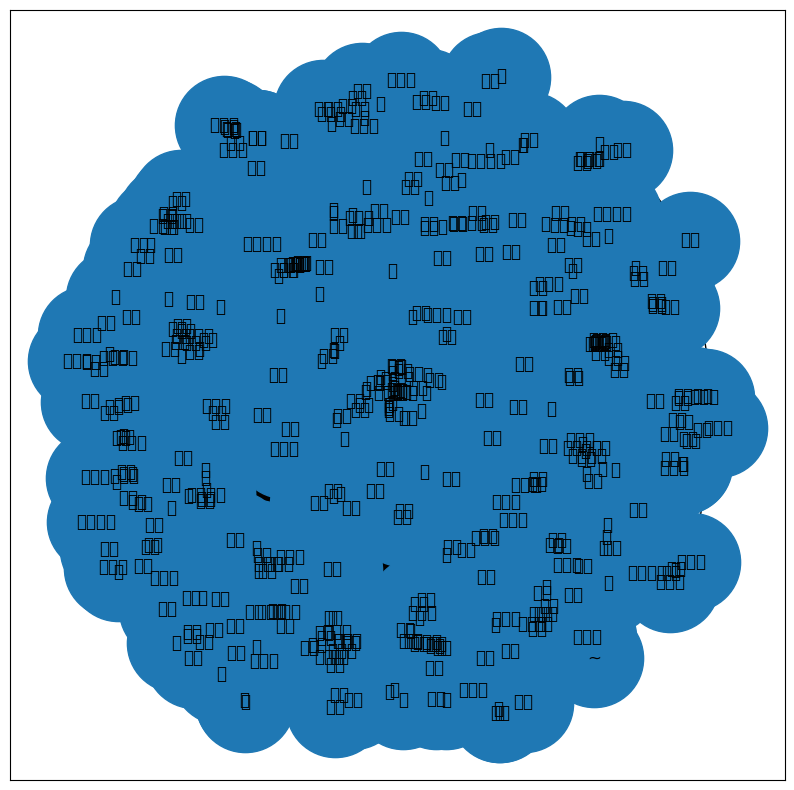

In [84]:
import networkx as nx

# 使用networkx创建图
G = nx.Graph()
for key, weight in co_occurrence.items():
    word1, word2 = key
    G.add_edge(word1, word2, weight=weight)

# 使用matplotlib进行可视化
pos = nx.spring_layout(G)
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G, pos, node_size=5000)
nx.draw_networkx_edges(G, pos, width=1)
nx.draw_networkx_labels(G, pos, font_size=12, font_family=font_path)
plt.show()

(-0.5, 799.5, 599.5, -0.5)

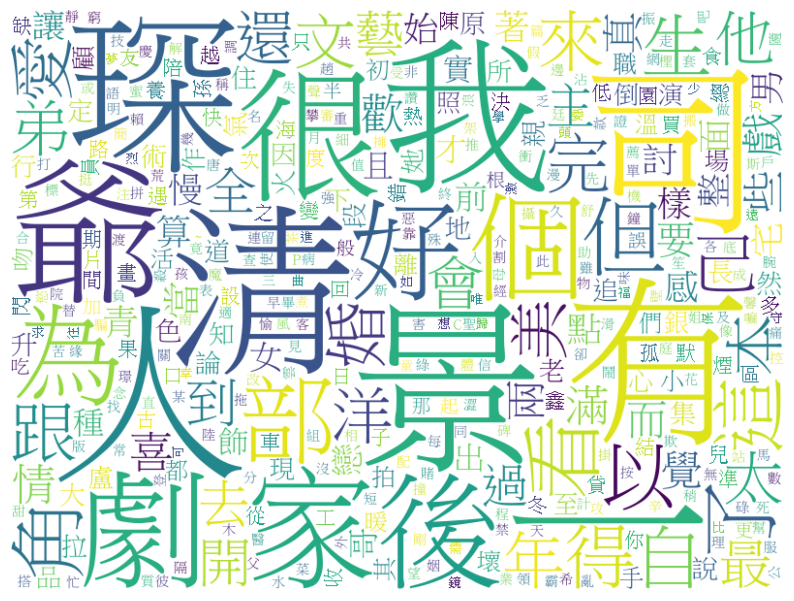

In [82]:
# 显示文字云

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')